In [1]:
import nengo
import numpy as np
import nengo_spa as spa
import pandas as pd
import seaborn as sns

/home/flo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
Ds = [64, 256, 512, 1024]   # size of semantic pointer
Ns = [10, 20, 50, 100, 200, 300, 400, 500, 1000]   # number of terms in semantic pointer

In [3]:
def calc_rmses(Ns, Ds, seeds):
    
    data = []
    for seed in seeds:
        rng = np.random.RandomState(seed=seed)
        vs = [np.random.uniform(0, 1, N) for ind,N in enumerate(Ns)] 
        for D in Ds:
            vocab = nengo.spa.Vocabulary(D, rng=rng)
            for ind, N in enumerate(Ns):
#                 print('dimension %i, number of items %i'%(D, N))
                m = np.array([vocab.parse('V%d' % i).v for i in range(N)])
                n = np.linalg.pinv(m)
                ptr = np.dot(vs[ind],m)       # map to semantic pointer space
                v_hat = np.dot(ptr, n)  # map back to normal vector space
                rmse = np.sqrt(np.mean((vs[ind]-v_hat)**2))
                vnorm = np.linalg.norm(ptr)
                d = dict(dimension=D, num_items=N, seed=seed, RMSE=rmse, norm=vnorm)
                data.append(d)
    df = pd.DataFrame(data)
    return df

In [4]:
import warnings; warnings.simplefilter('ignore')
df = calc_rmses(Ns, Ds, seeds=np.arange(4))

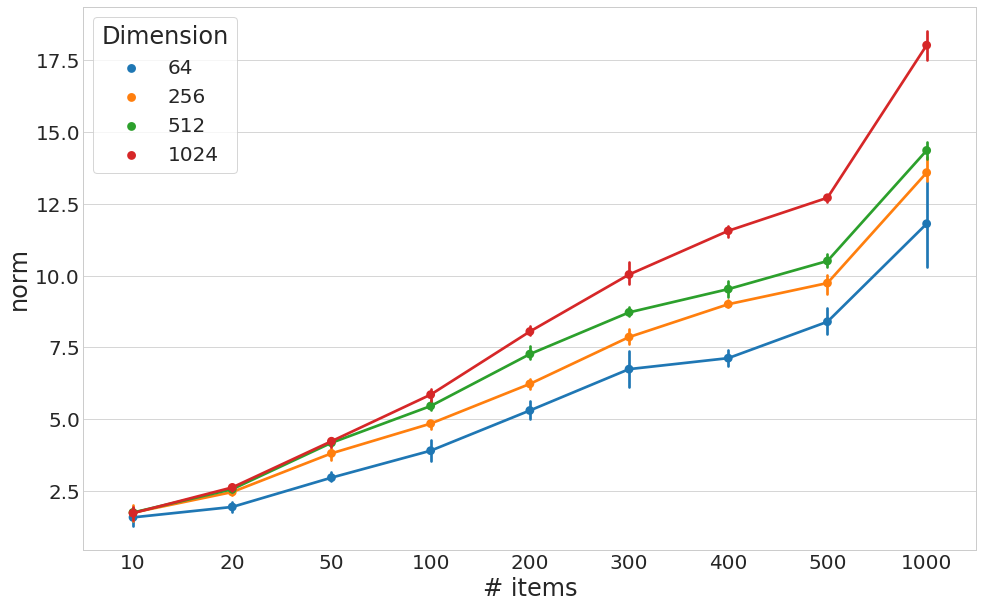

In [8]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig = plt.figure(figsize=(16,10))
ax = sns.pointplot(x='num_items', y='norm',hue='dimension', data=df, legend=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.set_xlabel('# items', fontsize=24)
ax.set_ylabel('norm', fontsize=24)
legend = ax.legend(frameon=True, fontsize=20, title='Dimension')
plt.setp(legend.get_title(),fontsize='24')
plt.show()

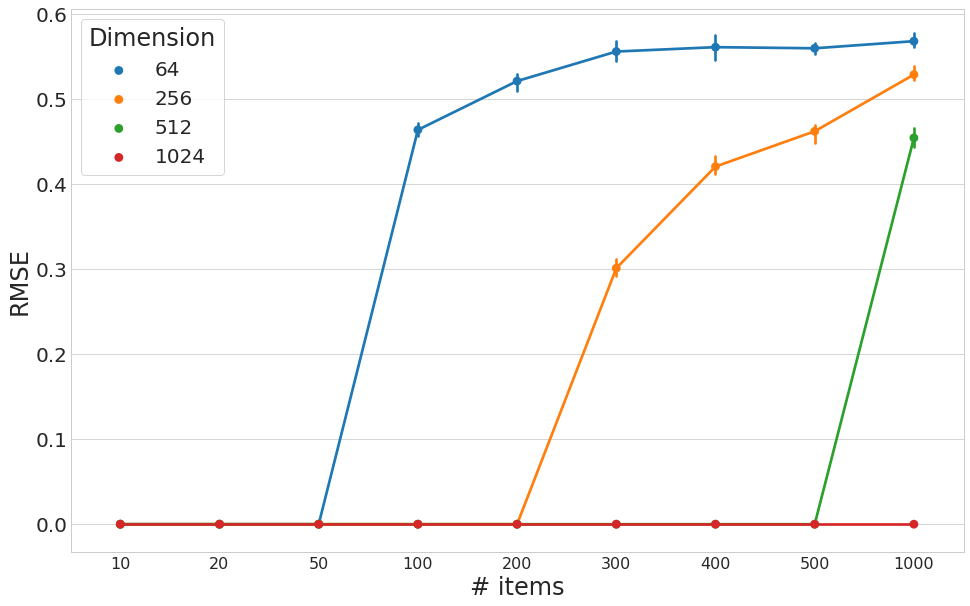

In [9]:
fig = plt.figure(figsize=(16,10))
ax = sns.pointplot(x='num_items', y='RMSE',hue='dimension', data=df, legend=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.set_xlabel('# items', fontsize=24)
ax.set_ylabel('RMSE', fontsize=24)
legend = ax.legend(frameon=True, fontsize=20, title='Dimension')
plt.setp(legend.get_title(),fontsize='24')
plt.show()

# old

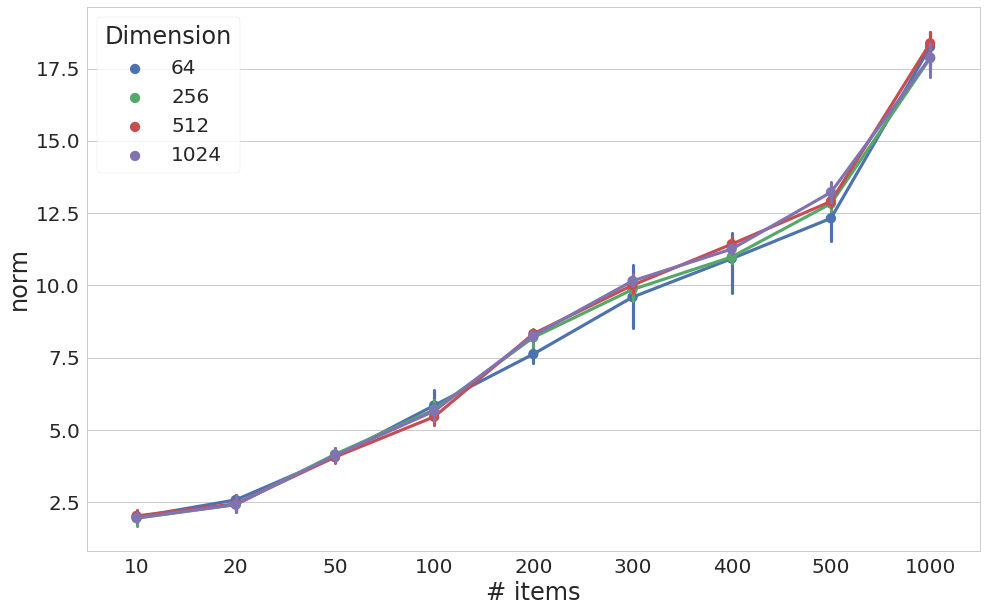

In [80]:
import matplib.pyplot as plt
fig = plt.figure(figsize=(16,10))
ax = sns.pointplot(x='num_items', y='norm',hue='dimension', data=df, legend=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.set_xlabel('# items', fontsize=24)
ax.set_ylabel('norm', fontsize=24)
legend = ax.legend(frameon=True, fontsize=20, title='Dimension')
plt.setp(legend.get_title(),fontsize='24')
plt.show()

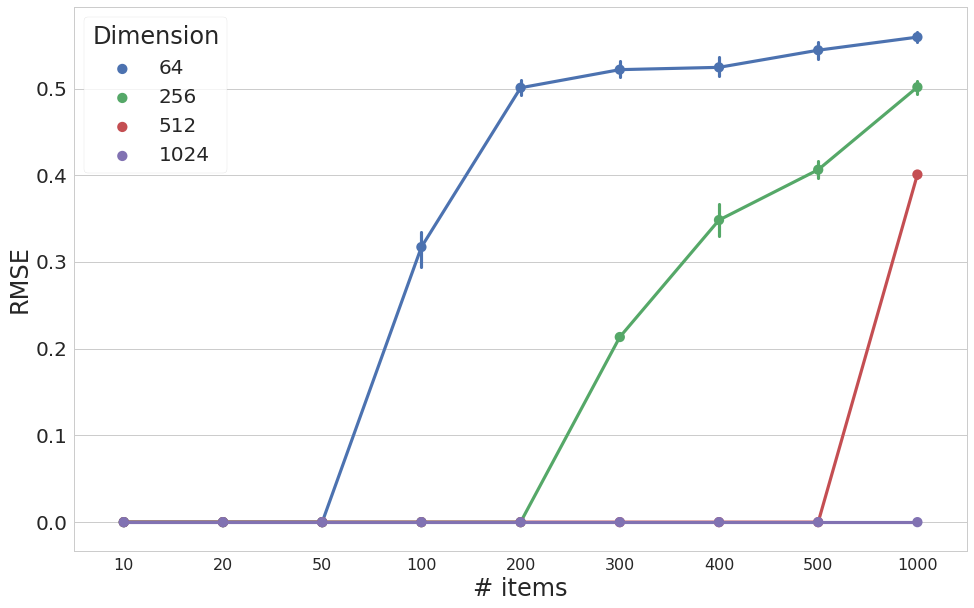

In [78]:
fig = plt.figure(figsize=(16,10))
ax = sns.pointplot(x='num_items', y='RMSE',hue='dimension', data=df, legend=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.set_xlabel('# items', fontsize=24)
ax.set_ylabel('RMSE', fontsize=24)
legend = ax.legend(frameon=True, fontsize=20, title='Dimension')
plt.setp(legend.get_title(),fontsize='24')
plt.show()